In [29]:
import numpy as np
import pandas as pd
import netCDF4
import xarray as xr
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import math
from scipy.integrate import odeint

In [22]:
#1.1
#load and filter the dataset
emission=pd.read_csv('global.1751_2014.csv')
emission['year'] = emission['year'].astype(int)
filter_emission=emission[(emission['year'] >= 1986) & (emission['year'] <= 2004)]
CO2=pd.read_csv('co2_annmean_mlo.csv')
filter_CO2=CO2[(CO2['year'] >= 1986) & (CO2['year'] <= 2004)]
#select the data
filter_emission = filter_emission.iloc[1:, 0:2]
filter_emission['Total C emission (pg)'] = filter_emission['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] / 1000  
data_new = pd.merge(filter_CO2[['year', 'mean']], filter_emission[['year', 'Total C emission (pg)']], on='year', how='inner')
#combine the data
data_new['Atmosphere C'] = data_new['mean']
data_new = data_new.drop(columns=['mean'])
data_new['CO2 level in ppm (without the buffer effect)'] = 347  
data_new

,year,Total C emission (pg),Atmosphere C,CO2 level in ppm (without the buffer effect)
0,1987,5.725,349.31,347
1,1988,5.936,351.69,347
2,1989,6.066,353.20,347
3,1990,6.074,354.45,347
4,1991,6.142,355.70,347
5,1992,6.078,356.54,347
6,1993,6.070,357.21,347
7,1994,6.174,358.96,347
8,1995,6.305,360.97,347
9,1996,6.448,362.74,347


In [42]:
#two-box model parameter
k12 = 105 / 740  
k21 = 102 / 900  
N1 = 740  
N2 = 900  
N0=740*10**21/12/347 
gama=data_new['Total C emission (pg)'] 

for year in range(1987,2004):
    dN1 = -k12*N1 + k21*N2 + gama[year-1986]
    dN2 =  k12*N1 - k21*N2
    N1 += dN1
    N2 += dN2
    if year != 1986:
        data_new['CO2 level in ppm (without the buffer effect)'][year-1986]=N1*10**21/12/N0
data_new

,year,Total C emission (pg),Atmosphere C,CO2 level in ppm (without the buffer effect)
0,1987,5.725,349.31,347.000000
1,1988,5.936,351.69,348.376746
2,1989,6.066,353.20,349.778535
3,1990,6.074,354.45,351.148675
4,1991,6.142,355.70,352.523806
5,1992,6.078,356.54,353.844368
6,1993,6.070,357.21,355.147149
7,1994,6.174,358.96,356.488780
8,1995,6.305,360.97,357.877533
9,1996,6.448,362.74,359.313970


In [71]:
#1.2 with buffer
N1 = 740  
N2 = 900  
N20= 821  
N0=740*10**21/12/347 
E=0
data_new['CO2 level in ppm (with buffer)'] =347
for year in range(1986,2004):   
    dN1 = -k12*N1 + k21*N20+k21*E*(N2-N20) + gama[year-1986]
    dN2 =  k12*N1 - k21*N20-k21*E*(N2-N20)
    N1 += dN1
    N2 += dN2
    data_new['CO2 level in ppm (with buffer)'][year-1986]=N1*10**21/12/N0
    E=3.69+1.86*10**(-2)*data_new['CO2 level in ppm (with buffer)'][year-1986]-1.8*10**(-6)*data_new['CO2 level in ppm (with buffer)'][year-1986]**2
data_new

/var/folders/yx/js3jvr652bx7g_xn_lgjpcy40000gn/T/ipykernel_61494/4179763897.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['CO2 level in ppm (with buffer)'][year-1986]=N1*10**21/12/N0


,year,Total C emission (pg),Atmosphere C,CO2 level in ppm (without the buffer effect),CO2 level in ppm (with buffer)
0,1987,5.725,349.31,347.000000,344.079417
1,1988,5.936,351.69,348.376746,389.412923
2,1989,6.066,353.20,349.778535,380.754686
3,1990,6.074,354.45,351.148675,387.029710
4,1991,6.142,355.70,352.523806,388.464146
5,1992,6.078,356.54,353.844368,391.431804
6,1993,6.070,357.21,355.147149,393.887768
7,1994,6.174,358.96,356.488780,396.564514
8,1995,6.305,360.97,357.877533,399.241289
9,1996,6.448,362.74,359.313970,402.001317


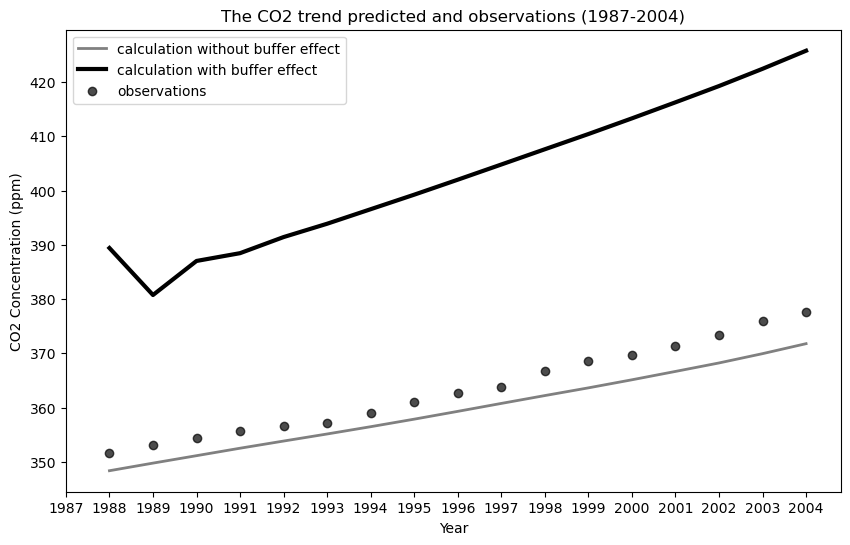

In [80]:
#1.3
data_newest = data_new[data_new['year'] > 1987]
plt.figure(figsize=(10, 6))
# without buffer
plt.plot(data_newest['year'], data_newest['CO2 level in ppm (without the buffer effect)'], label='calculation without buffer effect', color='grey',linewidth=2)
# with buffer effect
plt.plot(data_newest['year'], data_newest['CO2 level in ppm (with buffer)'], label='calculation with buffer effect', color='black',linewidth=3)
# observation
#plt.scatter(data_newest['year'], data_newest['year']['Atmosphere C'], label='observations', color='gray')
plt.scatter(data_newest['year'], data_newest['Atmosphere C'], color='k', label='observations', alpha=0.7)

#adjust the plot
plt.title('The CO2 trend predicted and observations (1987-2004)')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.xticks(range(1987, 2005, 1))
plt.legend()

plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)') 
plt.show()